In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
df=pd.read_csv("Admission_Predict.csv") 
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
# No Need of Label Encoding.Just Transform the Chance of Admit to binary val (1 if val>=0.75 else 0) 
from sklearn.preprocessing import Binarizer 
bi=Binarizer(threshold=0.75) 
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [6]:
x=df.drop('Chance of Admit ',axis=1)#independent features 
y=df['Chance of Admit '] #target series

In [7]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [8]:
y=y.astype("int") 
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

<Axes: xlabel='Chance of Admit ', ylabel='count'>

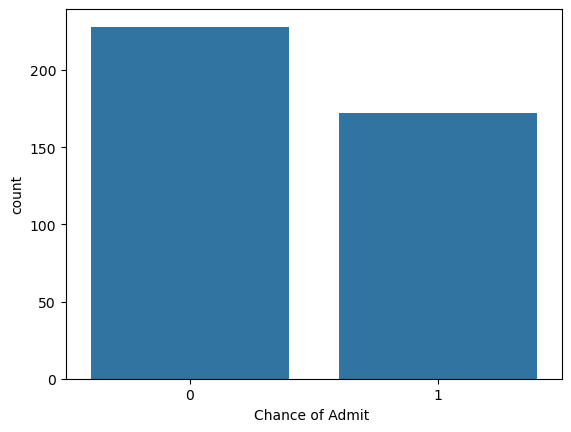

In [9]:
sns.countplot(x=y)

In [10]:
y.value_counts()

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

In [11]:
# Cross-Validation
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25) 
x_train.shape

(300, 8)

In [12]:
x_test.shape

(100, 8)

In [13]:
from sklearn.tree import DecisionTreeClassifier 

In [14]:
classifier=DecisionTreeClassifier(random_state=0) 

In [15]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
y_pred=classifier.predict(x_test)

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay ,accuracy_score,classification_report
result=pd.DataFrame({
    'Actual':y_test, 
    'Predict':y_pred
}) 
result

,Actual,Predict
56,0,0
19,0,0
253,1,1
238,0,0
256,1,0
...,...,...
325,1,1
111,0,1
247,0,0
162,0,0


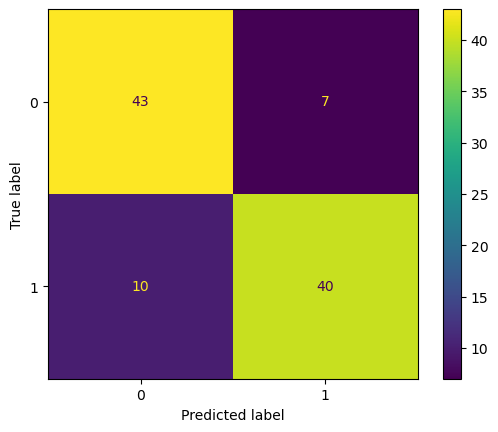

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred) 

In [19]:
accuracy_score(y_test,y_pred)

0.83

In [21]:
new=[[136,314,109,4,3.5,4.0,8.77,1]] 
print(classifier.predict(new)[0]) 

1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
